##Convolutional Neural Networks (CNNs)



## Prerequisites



In [ ]:
# Install necessary libraries and dependencies
%pip install numpy
%pip install torch torchvision
%pip install jupyter
%pip install scikit-learn
%pip install seaborn matplotlib
# !pip install numpy
# !pip install torch torchvision
# !pip install jupyter
# !pip install scikit-learn
# !pip install seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 131.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.5 MB/s eta 0:00:00


## Setup and Installation



In [ ]:
# Importing essential libraries and modules for deep learning and visualization
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Setting up device for GPU usage if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on {device}.")

device


Running on cuda.


device(type='cuda')

## Understanding the Fashion MNIST Dataset

The Fashion MNIST dataset is a collection of grayscale images of 10 fashion categories, each of size 28x28 pixels. It's used as a drop-in replacement for the classic MNIST dataset. It serves as a more challenging classification problem than the regular MNIST digit dataset due to the similarities in clothing items.

![Fashion MNIST Sample](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

Each image in the dataset corresponds to a label from 0-9, representing the ten categories:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |


## Data Loading and Preprocessing



In [ ]:
# Import the required transformations from torchvision
import torchvision.transforms as transforms

# Define a transformation pipeline.
# In this case, the images are converted into PyTorch tensor format.
transform = transforms.Compose([transforms.ToTensor()])

# Load the Fashion MNIST training dataset using torchvision.
# root specifies the directory where the dataset will be stored.
# train=True indicates that this is the training dataset.
# download=True downloads the dataset if it is not already available.
# transform applies the defined transformations to the images.
trainset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Create a DataLoader for the training dataset.
# The data is provided in batches of size 4.
# shuffle=True ensures the data is shuffled at the beginning of each epoch.
# num_workers=2 uses two subprocesses for data loading.
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# Load the Fashion MNIST test dataset in a similar way.
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

# Define the class labels for the Fashion MNIST dataset.
classes = (
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
)


100%|██████████| 26.4M/26.4M [00:02<00:00, 9.02MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 189kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.46MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.1MB/s]


## Convolutional Neural Networks (CNNs)



![CNN Architecture](https://miro.medium.com/max/2824/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)




In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        # Input: [batch_size, 1, 28, 28]
        self.conv1 = nn.Conv2d(1, 32, 3)  # Output: [batch_size, 32, 26, 26]

        # Input: [batch_size, 32, 26, 26]
        self.conv2 = nn.Conv2d(32, 64, 3) # Output: [batch_size, 64, 11, 11]

        self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Flattening: [batch_size, 64*5*5]
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Input: [batch_size, 1, 28, 28]
        x = F.relu(self.conv1(x))
        # Shape: [batch_size, 32, 26, 26]
        x = F.max_pool2d(x, 2)
        # Shape: [batch_size, 32, 13, 13]

        x = F.relu(self.conv2(x))
        # Shape: [batch_size, 64, 11, 11]
        x = F.max_pool2d(x, 2)
        # Shape: [batch_size, 64, 5, 5]

        x = x.view(-1, 64 * 5 * 5) # Flattening
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

## Training and Evaluation

### 1. Model Instantiation

We first create an instance of our model and transfer it to the appropriate device (either CPU or GPU).

In [ ]:
model = BasicCNN().to(device)

### 2. Optimizer and Loss Function


- **Optimizer**: The Adam optimizer is commonly used and adapts the learning rate during training.
- **Loss Function**: Since this is a classification task, we use the Cross Entropy Loss.


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## 3. Training Loop (




In [ ]:
# Number of complete passes through the dataset
num_epochs = 5

# Start the training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Iterate over each batch of the training data
    for images, labels in trainloader:
        # Move the images and labels to the computational device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Clear the gradients from the previous iteration
        optimizer.zero_grad()

        # Forward pass: Pass the images through the model to get the predicted outputs
        outputs = model(images)

        # Compute the loss between the predicted outputs and the true labels
        loss = criterion(outputs, labels)

        # Backward pass: Compute the gradient of the loss w.r.t. model parameters
        loss.backward()

        # Update the model parameters
        optimizer.step()


## Evaluation



              precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.82      0.87      0.84      1000
       Dress       0.92      0.90      0.91      1000
        Coat       0.86      0.80      0.83      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.70      0.74      0.72      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



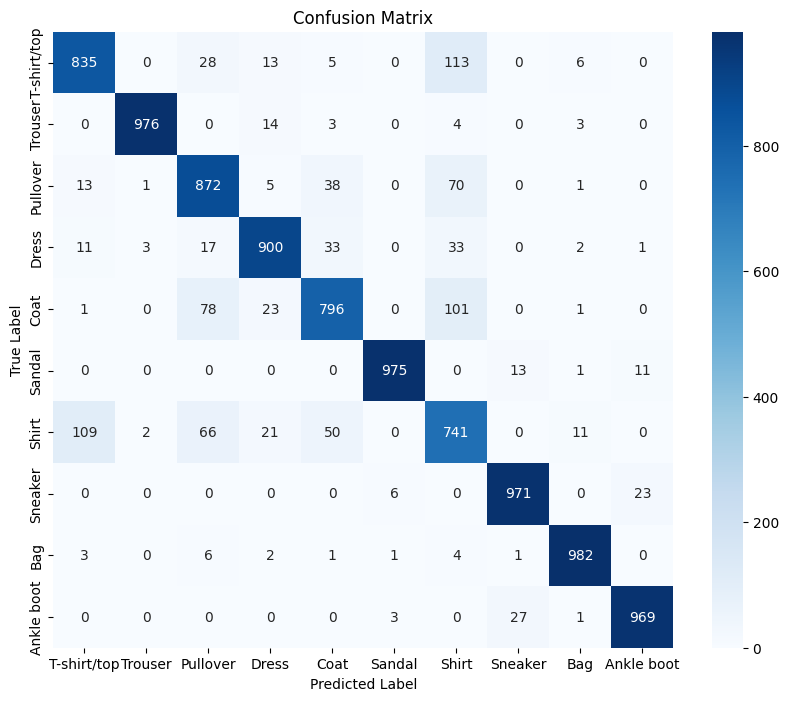

In [ ]:

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


model.eval()


all_preds = []
all_labels = []


with torch.no_grad():

    for images, labels in testloader:

        images, labels = images.to(device), labels.to(device)


        outputs = model(images)


        _, predicted = torch.max(outputs, 1)


        all_preds.extend(predicted.cpu().numpy())


        all_labels.extend(labels.cpu().numpy())


print(classification_report(all_labels, all_preds, target_names=classes))

# Compute the confusion matrix using true labels and predictions
cm = confusion_matrix(all_labels, all_preds)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')  # x-axis label
plt.ylabel('True Label')       # y-axis label
plt.title('Confusion Matrix')  # Title of the plot
plt.show()                     # Display the plot


## Advanced Topics: Regularization with Dropout


![Dropout](https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png)




In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class NetDropout(nn.Module):
    def __init__(self):
        super(NetDropout, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)  # Output shape: [batch_size, 32, 28, 28]
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1) # Output shape: [batch_size, 64, 14, 14]

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0) # Reduces spatial dimensions by half

        # Dropout layer
        self.dropout = nn.Dropout(0.25)  # Helps prevent overfitting

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 512)  # Flattened input to 512 output features
        self.fc2 = nn.Linear(512, 10)          # 512 input features to 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # Shape: [batch_size, 32, 14, 14]
        x = self.pool(F.relu(self.conv2(x))) # Shape: [batch_size, 64, 7, 7]

        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = self.dropout(x)         # Apply dropout

        x = F.relu(self.fc1(x))     # First fully connected layer with ReLU activation
        x = self.fc2(x)             # Second fully connected layer



        return x

# Instantiate the model with dropout
model_dropout = NetDropout().to(device)
model_dropout


NetDropout(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
optimizer = torch.optim.Adam(model_dropout.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## Training

## Logging and Observing the Loss During Training



In [ ]:
# Number of complete passes through the dataset
num_epochs = 5

# Start the training loop
for epoch in range(num_epochs):
    # Initialize a variable to keep track of the cumulative loss for this epoch
    running_loss = 0.0

    # Set the model to training mode
    model_dropout.train()

    # Iterate over each batch of the training data
    for i, (images, labels) in enumerate(trainloader):
        # Move the images and labels to the computational device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Clear the gradients from the previous iteration
        optimizer.zero_grad()

        # Forward pass: Pass the images through the model to get the predicted outputs
        outputs = model_dropout(images)

        # Compute the loss between the predicted outputs and the true labels
        loss = criterion(outputs, labels)

        # Backward pass: Compute the gradient of the loss w.r.t. model parameters
        loss.backward()

        # Update the model parameters
        optimizer.step()

        # Update the running loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")

print("Finished Training")



Epoch [1/5], Loss: 0.3893
Epoch [2/5], Loss: 0.2736
Epoch [3/5], Loss: 0.2429
Epoch [4/5], Loss: 0.2204
Epoch [5/5], Loss: 0.2095
Finished Training


## Evaluation

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.80      0.84      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.81      0.88      0.84      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.77      0.71      0.74      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



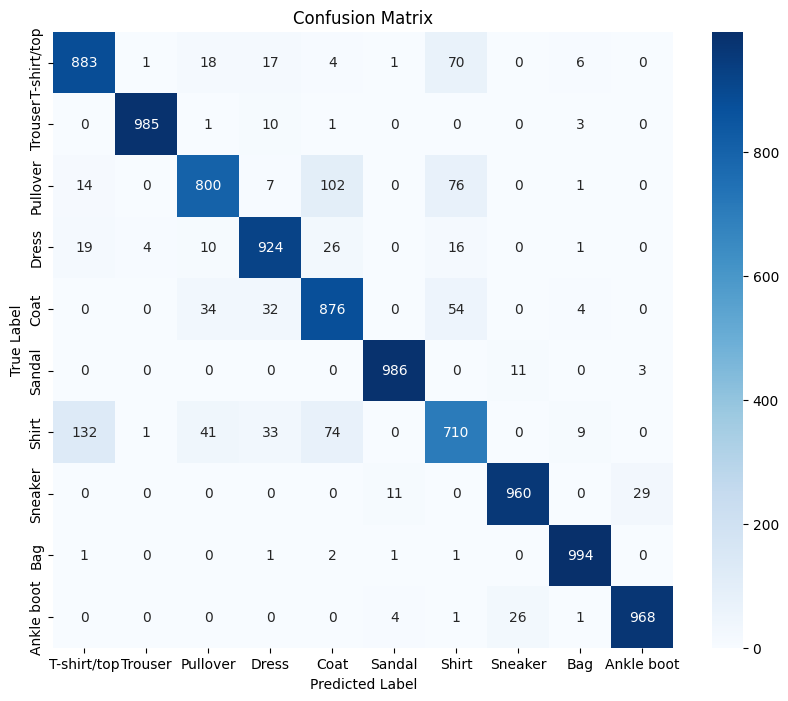

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


model_dropout.eval()


all_preds = []
all_labels = []


with torch.no_grad():
    # Iterate over all batches in the test loader
    for images, labels in testloader:
        # Transfer images and labels to the computational device (either CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Pass the images through the model to get predictions
        outputs = model_dropout(images)

        # Get the class with the maximum probability as the predicted class
        _, predicted = torch.max(outputs, 1)

        # Extend the all_preds list with predictions from this batch
        all_preds.extend(predicted.cpu().numpy())

        # Extend the all_labels list with true labels from this batch
        all_labels.extend(labels.cpu().numpy())

# Print a classification report which provides an overview of the model's performance for each class
print(classification_report(all_labels, all_preds, target_names=classes))

# Compute the confusion matrix using true labels and predictions
cm = confusion_matrix(all_labels, all_preds)


plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')  # x-axis label
plt.ylabel('True Label')       # y-axis label
plt.title('Confusion Matrix')  # Title of the plot
plt.show()                     # Display the plot
